<a href="https://colab.research.google.com/github/JoaoVictorRR-GitHub/Processamento_Digital_de_Sinais/blob/main/Atividades/Atividade_04__Analise_no_Dominio_da_Frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidade Federal do Espírito Santo** (Ufes)

**Centro Unicersitário Norte do Espírito Santo** (Ceunes)

---

**Processamento Digital de Sinais**

**Atividade 04:** Análise no Domínio da Frequência

**Aluno:** João Victor do Rozário Recla

# **Bibliotecas**
---

In [1]:
import numpy as Np
from numpy.fft import fft as fft
from numpy.fft import fftfreq as fftfreq
from numpy.fft import fftshift as fftshift
import scipy.signal as Sig
import matplotlib.pyplot as Graph

# **Laboratório de Python 03** - Análise no Domínio da Frequência
---

#### Questao 1)

In [ ]:
def DTFT_Discreto_(X):
  """
  Funcao para realizar a DTFT de
  um sinal no tempo discreto.

  Entrada:
    - Vetor de pontos do sinal.
    - Vetor de pontos do sinal no tempo.
  Saida:
    - Modulo do sinal na frequencia.
    - Fase do sinal na frequencia.
    - Periodo de amostragem do sinal na frequencia.
  """

  X = fft(X)                                            # DTFT do sinal.
  Periodo_w = fftfreq(len(X), d = 1.0) * (2 * Np.pi)    # Periodo de amostragem do sinal no tempo.
  W = fftshift(Periodo_w / Np.pi)                       # Periodo de amostragem do sinal na frequencia.

  X_Freq = fftshift(X)                                  # Ajuste do sinal na frequencia para a origem.
  X_Mod  = Np.abs(X_Freq)                               # Modulo do sinal na frequencia.
  X_Fase = Np.angle(X_Freq)                             # Fase do sinal na frequencia.

  return (X_Mod, X_Fase, W)


In [ ]:
def Plotar_Graficos_01_(X, Modulo, Fase, N, Periodo):
  
  Fig, Tabs = Graph.subplots(3, 1)
  Graph.subplots_adjust(hspace = 1)

  # Plote do sinal X[n].
  Tabs[0].stem(N, X, use_line_collection = True)
  Tabs[0].set_title("X[n]")
  Tabs[0].set_ylabel("Amplitude")
  Tabs[0].set_xlabel("n")
  Tabs[0].grid()

  # Plote do modulo do sinal X[n].
  Tabs[1].plot(Periodo, Modulo)
  Tabs[1].set_title("| X[k] |")
  Tabs[1].set_ylabel("Amplitude")
  Tabs[1].set_xlabel("w/pi")
  Tabs[1].grid()

  # Plote da fase do sinal X[n].
  Tabs[2].plot(Periodo, Fase)
  Tabs[2].set_title("Fase X[k]")
  Tabs[2].set_ylabel("Amplitude")
  Tabs[2].set_xlabel("w/pi")
  Tabs[2].grid()

  Fig.tight_layout()

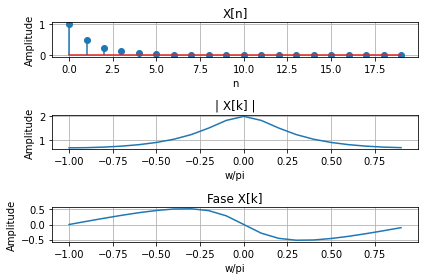

In [ ]:
# Letra A.
N = Np.arange(0, 20)                # Vetor de pontos no tempo.
U = Np.zeros(len(N), dtype = int)   # Sinal degrau.
U[N >=0 ] = 1

# Sinal.
X = []
for i in range(len(N)):
  X.append(Np.math.pow(0.5, N[i]) * U[i])

Modulo, Fase, Periodo = DTFT_Discreto_(X)
Plotar_Graficos_01_(X, Modulo, Fase, N, Periodo)

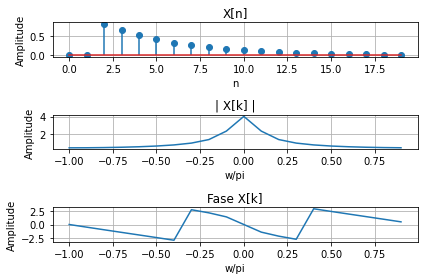

In [ ]:
# Letra B.
N  = Np.arange(0, 20)               # Vetor de pontos no tempo.
N1 = N-2                            # Vetor de pontos deslocado no tempo.
U = Np.zeros(len(N), dtype = int)   # Sinal degrau.
U[N1 >=0 ] = 1

# Sinal.
X = []
for i in range(len(N)):
  X.append(Np.math.pow(0.8, N[i]+2) * U[i] * 2)

Modulo, Fase, Periodo = DTFT_Discreto_(X)
Plotar_Graficos_01_(X, Modulo, Fase, N, Periodo)

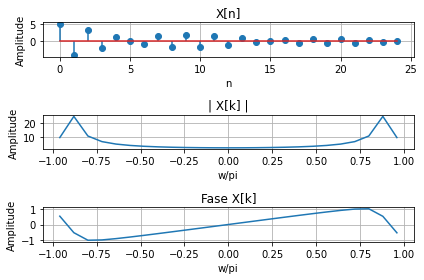

In [ ]:
# Letra C.
N = Np.arange(0, 25)                # Vetor de pontos no tempo.
U = Np.zeros(len(N), dtype = int)   # Sinal degrau.
U[N >=0 ] = 1

# Sinal.
X = []
for i in range(len(N)):
  X.append(Np.math.pow(-0.9, N[i]) * Np.math.cos((0.1) * Np.pi * N[i]) * U[i] * 5)

Modulo, Fase, Periodo = DTFT_Discreto_(X)
Plotar_Graficos_01_(X, Modulo, Fase, N, Periodo)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:1368: ComplexWarning: Casting complex values to real discards the imaginary part
  seg = np.asarray(seg, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


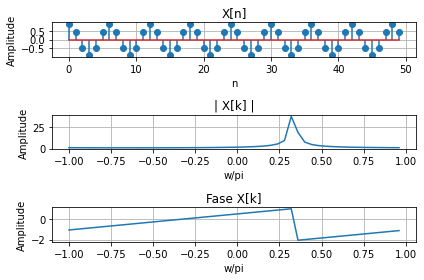

In [ ]:
# Letra D.
N = Np.arange(0, 50)                # Vetor de pontos no tempo.
U = Np.zeros(len(N), dtype = int)   # Sinal degrau.
U[N >=0 ] = 1

# Sinal.
X = []
for i in range(len(N)):
  X.append(((0.9) * Np.exp(complex(0, Np.pi/3)) ** N[i]) * U[i])

Modulo, Fase, Periodo = DTFT_Discreto_(X)
Plotar_Graficos_01_(X, Modulo, Fase, N, Periodo)

#### Questao 2)

In [ ]:
def DTFT_Continuo_(X, Periodo):
  """
  Funcao para realizar a DTFT de
  um sinal no tempo continuo.

  Entrada:
    - Vetor de pontos do sinal.
    - Vetor de pontos do sinal no tempo.
  Saida:
    - Modulo do sinal na frequencia.
    - Fase do sinal na frequencia.
    - Periodo de amostragem do sinal na frequencia [rad/s].
    - Periodo de amostragem do sinal na frequencia [Hz].
  """

  X = Periodo * fft(X)                                  # DTFT do sinal.
  Periodo_w = fftfreq(len(X), d = 1.0) * (2 * Np.pi)    # Periodo de amostragem do sinal no tempo.
  W1 = fftshift(Periodo_w / Periodo)                    # Periodo de amostragem do sinal na frequencia [rad/s].
  W2 = fftshift(Periodo_w / (2 * Periodo * Np.pi))      # Periodo de amostragem do sinal na frequencia [Hz].

  X_Freq = fftshift(X)                                  # Ajuste do sinal na frequencia para a origem.
  X_Mod  = Np.abs(X_Freq)                               # Modulo do sinal na frequencia.
  X_Fase = Np.angle(X_Freq)                             # Fase do sinal na frequencia.

  return (X_Mod, X_Fase, W1, W2)

In [ ]:
def Plotar_Graficos_02_(X, Modulo, Fase, N, Periodo_Rad, Periodo_Hz):
  
  Fig, Tabs = Graph.subplots(3, 1)
  Graph.subplots_adjust(hspace = 1)

  # Plote do sinal X[n].
  Tabs[0].stem(N, X, use_line_collection = True)
  Tabs[0].set_title("X[n] = X(n * Ts)")
  Tabs[0].set_ylabel("Amplitude")
  Tabs[0].set_xlabel("n * Ts")
  Tabs[0].grid()

  # Plote do modulo do sinal X[n].
  Tabs[1].plot(Periodo_Rad, Modulo)
  Tabs[1].set_title("| X[k] |")
  Tabs[1].set_ylabel("Amplitude")
  Tabs[1].set_xlabel("rad/s")
  Tabs[1].grid()

  # Plote da fase do sinal X[n].
  Tabs[2].plot(Periodo_Hz, Fase)
  Tabs[2].set_title("Fase X[k]")
  Tabs[2].set_ylabel("Amplitude")
  Tabs[2].set_xlabel("Hz")
  Tabs[2].grid()

  Fig.tight_layout()

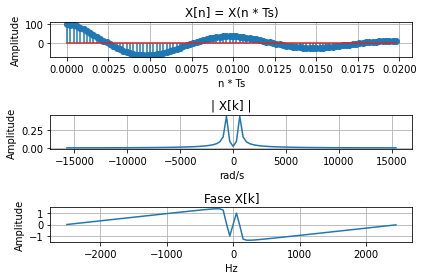

In [ ]:
# Letra A.
F = 5000                            # Frequencia por segundo.
T = 1/F                             # Tempo de amostragem.
N = Np.arange(0, 0.02, T)           # Vetor de pontos no tempo.   
U = Np.zeros(len(N), dtype = int)   # Sinal degrau.
U[N >= 0] = 1

# Sinal.
X = []
for i in range(len(N)):
  X.append(Np.math.cos(2 * Np.pi * 100 * N[i]) * Np.math.pow(Np.math.e, -100 * N[i]) * U[i] * 100)

Modulo, Fase, Periodo_Rad, Periodo_Hz = DTFT_Continuo_(X, T)
Plotar_Graficos_02_(X, Modulo, Fase, N, Periodo_Rad, Periodo_Hz)

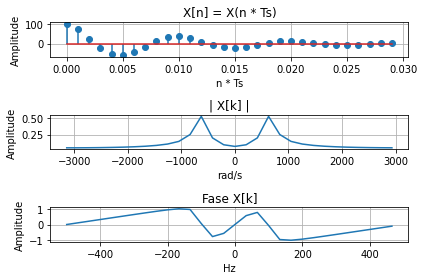

In [ ]:
# Letra B.
F = 1000                            # Frequencia por segundo.
T = 1/F                             # Tempo de amostragem.
N = Np.arange(0, 0.03, T)           # Vetor de pontos no tempo.   
U = Np.zeros(len(N), dtype = int)   # Sinal degrau.
U[N >= 0] = 1

# Sinal.
X = []
for i in range(len(N)):
  X.append(Np.math.cos(2 * Np.pi * 100 * N[i]) * Np.math.pow(Np.math.e, -100 * N[i]) * U[i] * 100)

Modulo, Fase, Periodo_Rad, Periodo_Hz = DTFT_Continuo_(X, T)
Plotar_Graficos_02_(X, Modulo, Fase, N, Periodo_Rad, Periodo_Hz)